In [1]:
# 載入需要的套件
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 用GPU 
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# 參數們
batch_size = 32
num_classes = 10
epochs = 25

In [4]:
# 載入資料
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape) # 50000 + 10000照片, 每張大小32x32x3(RGB)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 111s 1us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# 改變x的資料型態（uint8 -> float32)
print('before:', x_train.dtype)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('after:', x_train.dtype)

# 從0~255縮放到0~1
x_train /= 255
x_test /= 255

before: uint8
after: float32


In [6]:
# 幫每個類別取名子
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

original_y_train = y_train.copy()
original_y_test = y_test.copy()

# 改成onehot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(original_y_train[0])
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


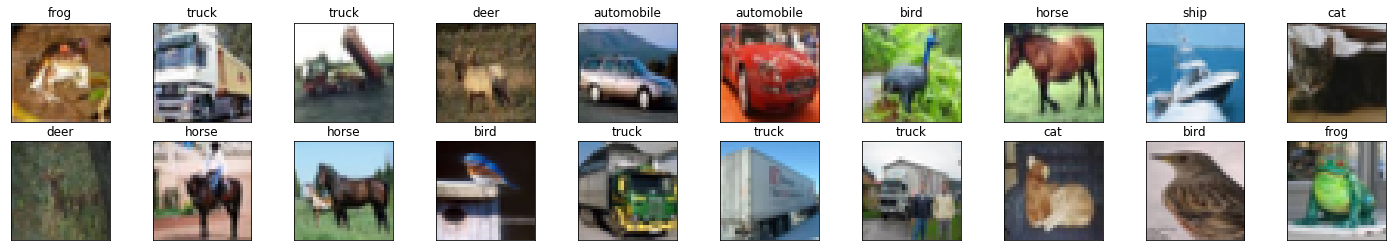

In [7]:
def imshow(img):
    plt.imshow(img)
    
# 拿前20張出來看看
images, labels = x_train[:20], original_y_train[:20]

# 畫出來
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx][0]])

In [8]:
# 建立模型
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 優化器
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# 編譯模型
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# 訓練模型
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 19s 390us/step - loss: 0.0914 - acc: 0.9708 - val_loss: 1.2867 - val_acc: 0.7402
Epoch 2/25
50000/50000 [==============================] - 19s 383us/step - loss: 0.0776 - acc: 0.9759 - val_loss: 1.4722 - val_acc: 0.7193
Epoch 3/25
50000/50000 [==============================] - 19s 382us/step - loss: 0.0634 - acc: 0.9803 - val_loss: 1.4816 - val_acc: 0.7392
Epoch 4/25
50000/50000 [==============================] - 19s 380us/step - loss: 0.0540 - acc: 0.9829 - val_loss: 1.5037 - val_acc: 0.7402
Epoch 5/25
50000/50000 [==============================] - 19s 381us/step - loss: 0.0477 - acc: 0.9851 - val_loss: 1.5492 - val_acc: 0.7329
Epoch 6/25
50000/50000 [==============================] - 19s 381us/step - loss: 0.0432 - acc: 0.9865 - val_loss: 1.6670 - val_acc: 0.7334
Epoch 7/25
50000/50000 [==============================] - 19s 381us/step - loss: 0.0366 - acc: 0.9888 - val_loss: 1.

In [10]:
# 看它的正確率
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 122us/step
Test loss: 1.257703802204132
Test accuracy: 0.741


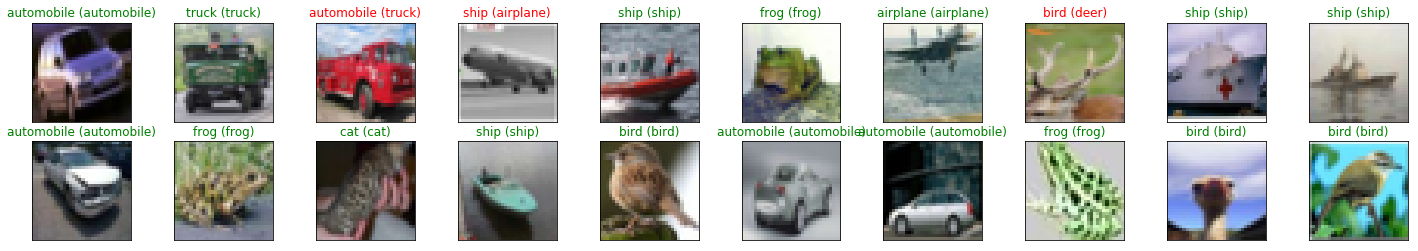

In [11]:
# 隨機取20個出來看看
idx = np.random.randint(10000, size=20)

images, labels = x_test[idx], original_y_test[idx].reshape(20,)
preds = np.argmax(model.predict(x_test[idx]), axis=1)

# 畫出來
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]), color=("green" if preds[idx]==labels[idx] else "red"))